## Mini Project
# Outlier Removal Regression

In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Load up some practice data with outliers in it.

In [2]:
ages = pickle.load(open("practice_outliers_ages.pkl", "rb"))
net_worths = pickle.load(open("practice_outliers_net_worths.pkl", "rb"))

**ages** and **net_worths** need to be reshaped into 2D numpy arrays. The second argument of reshape command is a tuple of integers: (n_rows, n_columns). By convention, *n_rows* is the number of data points and *n_columns* is the number of features.

In [3]:
ages = np.reshape(np.array(ages), (len(ages), 1))
net_worths = np.reshape(np.array(net_worths),
                           (len(net_worths), 1))
ages_train, ages_test, net_worths_train, net_worths_test = \
    train_test_split(ages, net_worths, test_size=0.1, random_state=42)

Build and train a regression model to predict _net_worth_ against _age_ by using all the training data.

Slope of this regression model: 5.077930643440256
Score for this model: 0.8782624703664671


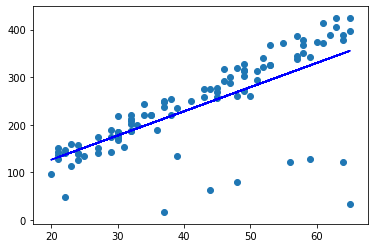

In [4]:
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

print(f'Slope of this regression model: {reg.coef_.item()}')
print('Score for this model: {}' \
      .format(reg.score(ages_test, net_worths_test)))

plt.plot(ages, reg.predict(ages), color="blue")
plt.scatter(ages, net_worths)
plt.show()

Identify and remove the most outlier-y points.

In [5]:
def outlier_cleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    complete_data = [(a.item(), nw.item(), nw.item() - p.item()) \
                     for a, nw, p \
                     in zip(ages, net_worths, predictions)]

    # Order 'complete_data' using the error for comparison
    complete_data.sort(key = lambda x: abs(x[2]))
    
    # Filter out 10% of the data
    cleaned_data = complete_data[:int(len(complete_data)*0.9)]

    return cleaned_data

In [6]:
cleaned_data = []
predictions = reg.predict(ages_train)
cleaned_data = outlier_cleaner(predictions,
                               ages_train,
                               net_worths_train)

In [7]:
len(cleaned_data)

81

Train a new model after removing outliers.

Slope of this regression model: 6.368594806943666
Score for this model: 0.983189455395532


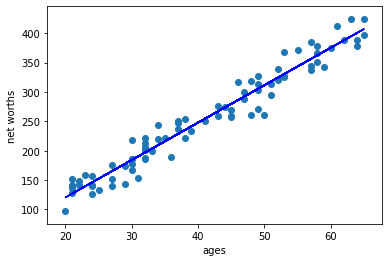

In [8]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages = np.reshape(np.array(ages), (len(ages), 1))
    net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    reg.fit(ages, net_worths)

    print(f'Slope of this regression model: {reg.coef_.item()}')
    print('Score for this model: {}' \
          .format(reg.score(ages_test, net_worths_test)))

    plt.plot(ages, reg.predict(ages), color="blue")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()